---

### Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import yfinance as yf
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\eliza\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#Download stock data
def download_data(tickers, start_date):
    stock_data = yf.download(tickers,start=start_date)
    stock_data = stock_data.drop(columns=["Close", "High", "Low", "Open", "Volume"])
    stock_data["Adj Close"] = stock_data['Adj Close'].astype(float)
    stock_data = stock_data.dropna()
    return stock_data

In [3]:
# Download SPY (SP500) Prices
SP500_df = download_data(["SPY"], "1980-01-01")
SP500_df.head()

[*********************100%***********************]  1 of 1 completed


Adj Close
Date                 
1993-01-29  26.079659
1993-02-01  26.265144
1993-02-02  26.320782
1993-02-03  26.599014
1993-02-04  26.710312

In [4]:
SP500_df.tail()

Adj Close
Date                  
2020-09-17  334.501007
2020-09-18  330.649994
2020-09-21  326.970001
2020-09-22  330.299988
2020-09-23  322.640015

## Save data as a CSV file

In [5]:
csv_path = Path("Data/SP500.csv")
SP500_df .to_csv(csv_path)

## Read in CSV as Pandas DataFrame

In [6]:
# Set path to CSV and read in CSV
csv_path = Path('Data/SP500.csv')
sp500_df=pd.read_csv(csv_path)
#sp500_df

## Calculate Daily Returns

In [7]:
# Calculate daily percent return
SP500_df['daily_return'] = SP500_df['Adj Close'].pct_change()
SP500_df

Adj Close  daily_return
Date                                
1993-01-29   26.079659           NaN
1993-02-01   26.265144      0.007112
1993-02-02   26.320782      0.002118
1993-02-03   26.599014      0.010571
1993-02-04   26.710312      0.004184
...                ...           ...
2020-09-17  334.501007     -0.008795
2020-09-18  330.649994     -0.011513
2020-09-21  326.970001     -0.011130
2020-09-22  330.299988      0.010184
2020-09-23  322.640015     -0.023191

[6964 rows x 2 columns]

## Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)

In [8]:
# Set short and long windows
short_window = 1
long_window = 30

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
SP500_df['fast_close'] = SP500_df['Adj Close'].ewm(halflife=short_window).mean()
SP500_df['slow_close'] = SP500_df['Adj Close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
SP500_df['crossover_long'] = np.where(SP500_df['fast_close'] > SP500_df['slow_close'], 1.0, 0.0)
SP500_df['crossover_short'] = np.where(SP500_df['fast_close'] < SP500_df['slow_close'], -1.0, 0.0)
SP500_df['crossover_signal'] = SP500_df['crossover_long'] + SP500_df['crossover_short']

SP500_df.head()

Adj Close  daily_return  fast_close  slow_close  crossover_long  \
Date                                                                          
1993-01-29  26.079659           NaN   26.079659   26.079659             0.0   
1993-02-01  26.265144      0.007112   26.203316   26.173473             1.0   
1993-02-02  26.320782      0.002118   26.270439   26.223715             1.0   
1993-02-03  26.599014      0.010571   26.445679   26.320816             1.0   
1993-02-04  26.710312      0.004184   26.582264   26.402356             1.0   

            crossover_short  crossover_signal  
Date                                           
1993-01-29              0.0               0.0  
1993-02-01              0.0               1.0  
1993-02-02              0.0               1.0  
1993-02-03              0.0               1.0  
1993-02-04              0.0               1.0

### Plot Exponential Moving Average of Closing Prices

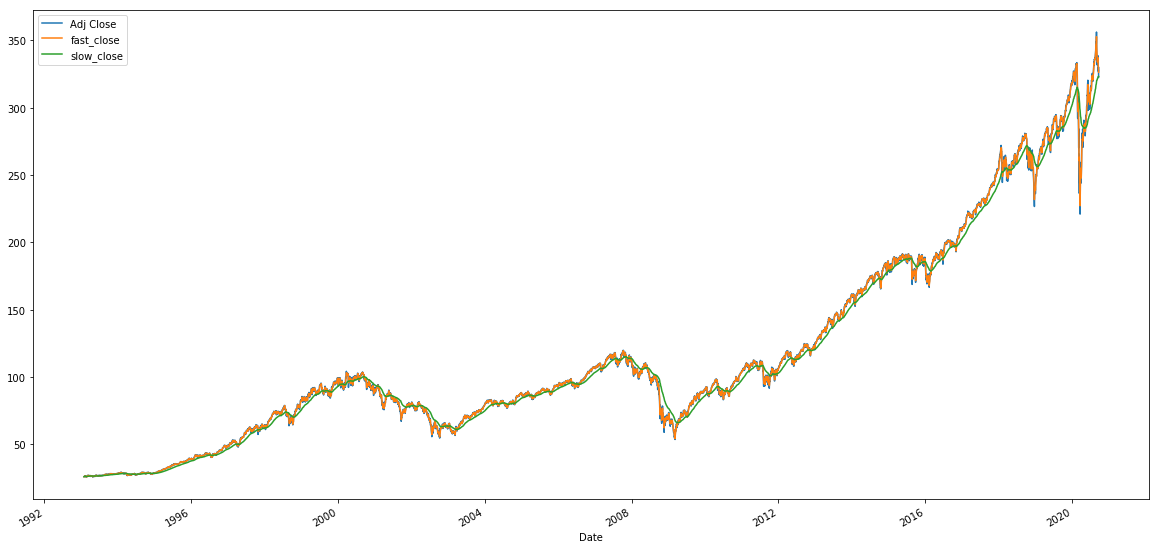

In [9]:
# Plot the EMA of BTC/USD closing prices
SP500_df[['Adj Close', 'fast_close', 'slow_close']].plot(figsize=(20,10))

### Construct Exponential Moving Average of Daily Return Volatility (Trading Signal, Feature Two)

In [10]:
# Set short and long volatility windows
short_vol_window = 1
long_vol_window = 30

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
SP500_df['fast_vol'] = SP500_df['daily_return'].ewm(halflife=short_vol_window).std()
SP500_df['slow_vol'] = SP500_df['daily_return'].ewm(halflife=long_vol_window).std()

# Construct a crossover trading signal
SP500_df['vol_trend_long'] = np.where(SP500_df['fast_vol'] < SP500_df['slow_vol'], 1.0, 0.0)
SP500_df['vol_trend_short'] = np.where(SP500_df['fast_vol'] > SP500_df['slow_vol'], -1.0, 0.0) 
SP500_df['vol_trend_signal'] = SP500_df['vol_trend_long'] + SP500_df['vol_trend_short']

SP500_df

Adj Close  daily_return  fast_close  slow_close  crossover_long  \
Date                                                                           
1993-01-29   26.079659           NaN   26.079659   26.079659             0.0   
1993-02-01   26.265144      0.007112   26.203316   26.173473             1.0   
1993-02-02   26.320782      0.002118   26.270439   26.223715             1.0   
1993-02-03   26.599014      0.010571   26.445679   26.320816             1.0   
1993-02-04   26.710312      0.004184   26.582264   26.402356             1.0   
...                ...           ...         ...         ...             ...   
2020-09-17  334.501007     -0.008795  335.920256  322.918942             1.0   
2020-09-18  330.649994     -0.011513  333.285125  323.095520             1.0   
2020-09-21  326.970001     -0.011130  330.127563  323.184013             1.0   
2020-09-22  330.299988      0.010184  330.213775  323.346542             1.0   
2020-09-23  322.640015     -0.023191  326.426895  323.330405             1.0   

            crossover_short  crossover_signal  fast_vol  slow_vol  \
Date                                                                
1993-01-29              0.0               0.0       NaN       NaN   
1993-02-01              0.0               1.0       NaN       NaN   
1993-02-02              0.0               1.0  0.003531  0.003531   
1993-02-03              0.0               1.0  0.004889  0.004271   
1993-02-04              0.0               1.0  0.003883  0.003680   
...                     ...               ...       ...       ...   
2020-09-17              0.0               1.0  0.008768  0.015592   
2020-09-18              0.0               1.0  0.007654  0.015527   
2020-09-21              0.0               1.0  0.005773  0.015452   
2020-09-22              0.0               1.0  0.012720  0.015344   
2020-09-23              0.0               1.0  0.016991  0.015586   

            vol_trend_long  vol_trend_short  vol_trend_signal  
Date                                                           
1993-01-29             0.0              0.0               0.0  
1993-02-01             0.0              0.0               0.0  
1993-02-02             0.0             -1.0              -1.0  
1993-02-03             0.0             -1.0              -1.0  
1993-02-04             0.0             -1.0              -1.0  
...                    ...              ...               ...  
2020-09-17             1.0              0.0               1.0  
2020-09-18             1.0              0.0               1.0  
2020-09-21             1.0              0.0               1.0  
2020-09-22             1.0              0.0               1.0  
2020-09-23             0.0             -1.0              -1.0  

[6964 rows x 12 columns]

### Plot Exponential Moving Average of Daily Return Volatility

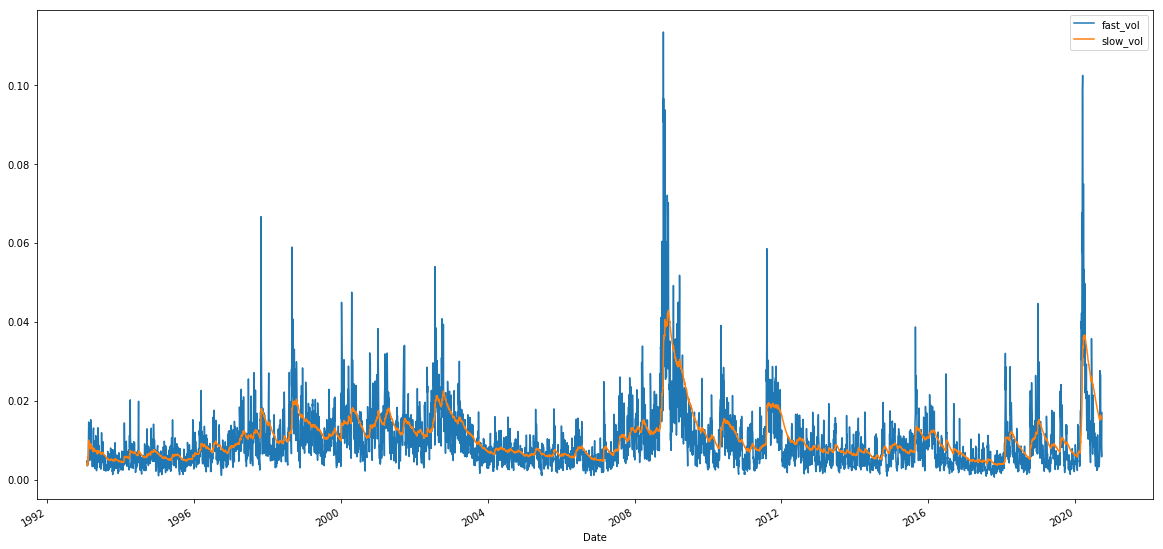

In [11]:
# Plot the EMA of BTC/USD daily return volatility
SP500_df[['fast_vol', 'slow_vol']].plot(figsize=(20,10))